In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame = False)

In [ ]:
print(mnist.data[0])
print(mnist.target[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

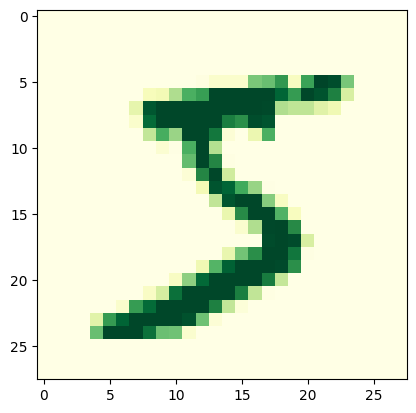

In [ ]:
import matplotlib.pyplot as plt


plt.imshow((mnist.data[0]).reshape(28,28),cmap='YlGn')

In [ ]:
# Function to plot images
def Plotter(data):
  image = data.reshape(28,28)
  plt.imshow(image,cmap='YlGn')


In [4]:
X,y = mnist.data,mnist.target
print(len(X),len(y))

70000 70000


In [ ]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42)

SGD.fit(X_train,y_train)

SGDClassifier(random_state=42)

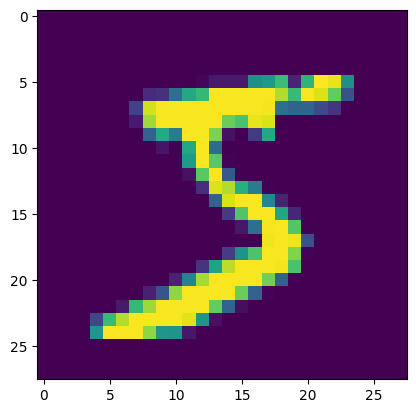

In [ ]:
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
pred = (SGD.predict(X_train[0].reshape(1,-1)))
print(pred)

['3']


In [ ]:
from sklearn.metrics import confusion_matrix
predict = SGD.predict(X_test)

matrix = confusion_matrix(predict,y_test)
print(matrix)

[[ 902    0    1    0    2    6    5    0    3    3]
 [   0 1095   10    1    2    2    3    3    5    5]
 [   8    2  803    6    9    1   12   18    2    2]
 [  11    3   69  931   15   71   13   20   30   33]
 [   1    0    6    1  778    3    5    3    4    7]
 [  13    2    4   21    4  709   21    4   43    5]
 [   2    4    4    3    2   12  854    1    5    0]
 [   4    1   10    7    9   12    0  919    5   20]
 [  39   28  122   35   62   67   45   18  872   57]
 [   0    0    3    5   99    9    0   42    5  877]]


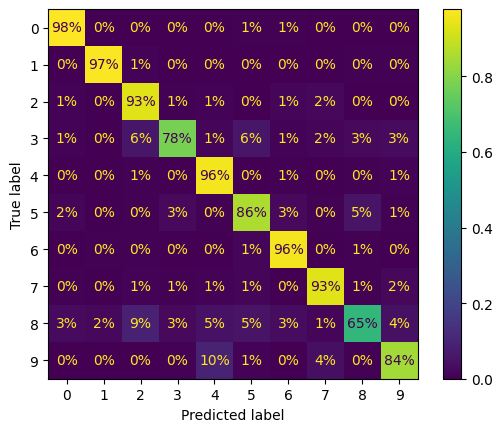

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(predict,y_test,normalize='true',values_format='.0%')

In [ ]:
# from sklearn.metrics import roc_curve


# y_scores = SGD.decision_function(X_test)


# print(y_scores[0].round(2))
# # fpr,tpr,thresholds = roc_curve(y_test,y_scores)

# # plt.plot(fpr,tpr)

TRAINING ON A BINARY CLASSIFIER


In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
print(y_train_5)

[ True False False ...  True False False]


In [ ]:
model2 = SGD.fit(X_train,y_train_5)

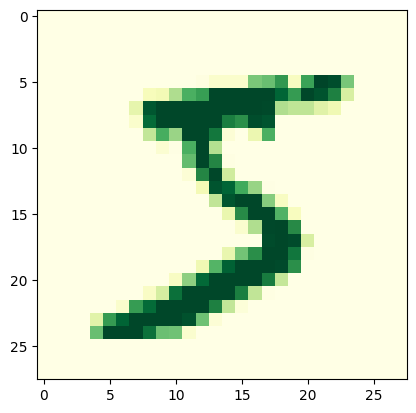

In [ ]:
some_digit = X[0]
Plotter(some_digit)

In [ ]:
# some digit is  5
model2.predict(some_digit.reshape(1, -1))

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model2,X_train,y_train,cv = 3, scoring='accuracy')

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model2,X_train,y_train_5,cv=3)

In [ ]:
print(y_train_pred)

[ True False False ...  True False False]


[[53892  1891]
 [  687  3530]]


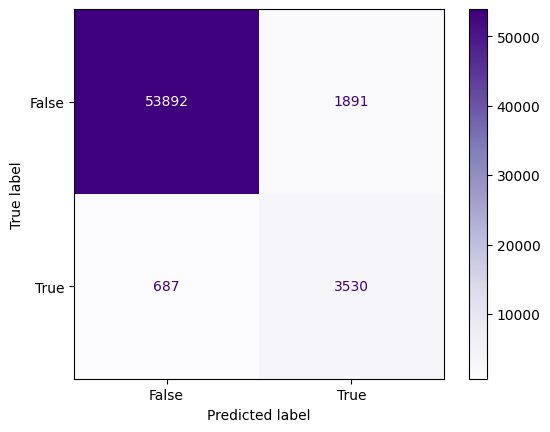

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_train_pred,y_train_5)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_train_pred,y_train_5,cmap='Purples')

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

print('precison:',precision_score(y_train_5, y_train_pred))
print('recall:',recall_score(y_train_5,y_train_pred))
print('f1_score:',f1_score(y_train_5,y_train_pred))

precison: 0.8370879772350012
recall: 0.6511713705958311
f1_score: 0.7325171197343847


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from joblib import dump, load

# Save model
dump(SGD, '/content/drive/MyDrive/SGD.joblib')
dump(model2, '/content/drive/MyDrive/model2.joblib')


# Load model
# SGD = load('/content/drive/MyDrive/SGD.joblib')


['/content/drive/MyDrive/model2.joblib']

In [ ]:
model2 = load('/content/drive/MyDrive/model2.joblib')
SGD = load('/content/drive/MyDrive/SGD.joblib')

Adding decision function in cross_val_predict gives us the scores , instead of label predicions, which tell us how confident the model was towards predicting a lable, like  Positive → model leans toward class 1.

Negative → model leans toward class 0.

when to use >= vs <=
When thresholds are in increasing order (as in precision_recall_curve): To find the first point where precision exceeds 90%, you use:


index = (precisions >= 0.90).argmax()

When thresholds are in decreasing order (as in roc_curve):

To find the point where threshold drops below some value, you use:
index = (thresholds <= desired_threshold).argmax()


In [ ]:
from  sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(model2,X_train,y_train_5,cv = 3,method='decision_function')


precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)


print(len(y_train_pred),len(y_train_5))
print(len(precisions))


60000 60000
60001


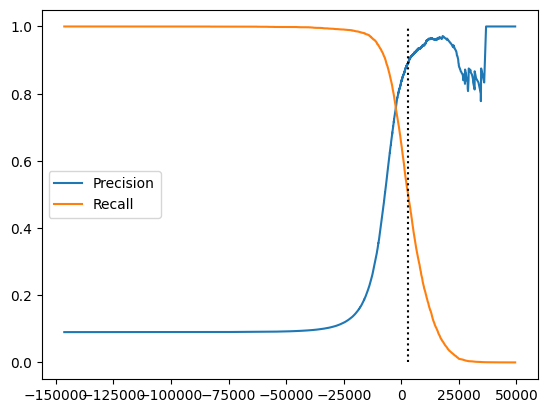

In [ ]:
threshold = 3000
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1],label="Recall")
plt.legend(loc='center left')
plt.vlines(threshold, 0, 1.0,"k",'dotted', label="threshold")

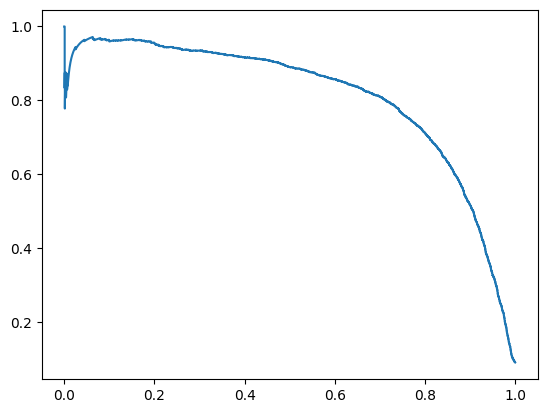

In [ ]:
plt.plot(recalls,precisions)

A threshold is a specific value used to decide whether the model's confidence score (or decision score/probability) is high enough to classify an example as positive (1) or negative (0).

NumPy array’s argmax() method. This returns the
first index of the maximum value,

In [ ]:
idx_for_90_precision = (precisions>=0.90).argmax()
idx_for_90_precision

np.int64(57109)

In [ ]:
thresholds_90_precision = thresholds[idx_for_90_precision]
thresholds_90_precision

np.float64(3370.0194991439557)

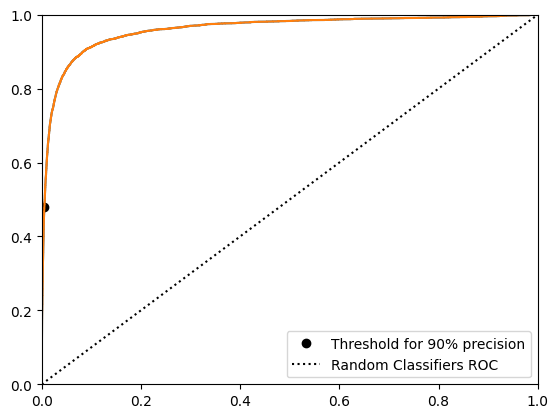

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

idx_for_threshold_at_90 = (thresholds <= thresholds_90_precision).argmax()

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)
tpr_90 = tpr[idx_for_threshold_at_90]
fpr_90 = fpr[idx_for_threshold_at_90]


plt.plot(fpr,tpr)
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.plot([0,1],[0,1],'k:',label="Random Classifiers ROC")
plt.legend(loc='lower right')
plt.axis([0, 1, 0, 1])
plt.plot(fpr,tpr)

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/X_train.npy', X_train)
np.save('/content/drive/MyDrive/X_test.npy', X_test)
np.save('/content/drive/MyDrive/y_train.npy', y_train)
np.save('/content/drive/MyDrive/y_test.npy', y_test)
np.save('/content/drive/MyDrive/y_train_5.npy', y_train_5)
np.save('/content/drive/MyDrive/y_test_5.npy', y_test_5)
np.save('/content/drive/MyDrive/y_scores.npy', y_scores)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np

X_train = np.load('/content/drive/MyDrive/X_train.npy', allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/X_test.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/y_train.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/y_test.npy', allow_pickle=True)
y_train_5 = np.load('/content/drive/MyDrive/y_train_5.npy', allow_pickle=True)
y_test_5 = np.load('/content/drive/MyDrive/y_test_5.npy', allow_pickle=True)
y_scores = np.load('/content/drive/MyDrive/y_scores.npy', allow_pickle=True)


In [ ]:
from joblib import dump, load

model2 = load('/content/drive/MyDrive/model2.joblib')
SGD = load('/content/drive/MyDrive/SGD.joblib')

the best way to compare classifers is the **area under the curve** , A perfect classifier would have ROC AUC equal to 1, purly random would have it eual to 0.5

In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_train_5,y_scores)
print(score)

0.9604938554008616


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RfClassifier = RandomForestClassifier(random_state=42)

Random forrest classifier does not have a decision function but we can use Predict_proba to get the probabilities of the calss, the method at default is 'predict' which gives the label ie True/False

In [ ]:
y_probabs_RF = cross_val_predict(RfClassifier,X_train,y_train_5,cv=3,method='predict_proba')

In [ ]:
y_probabs_RF[0]

array([0.11, 0.89])

plotting for the column with positive class

In [ ]:
y_RF_scores = y_probabs_RF[:,1]

In [ ]:
rf_precision,rf_recall,rf_threshold = precision_recall_curve(y_train_5,y_RF_scores)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

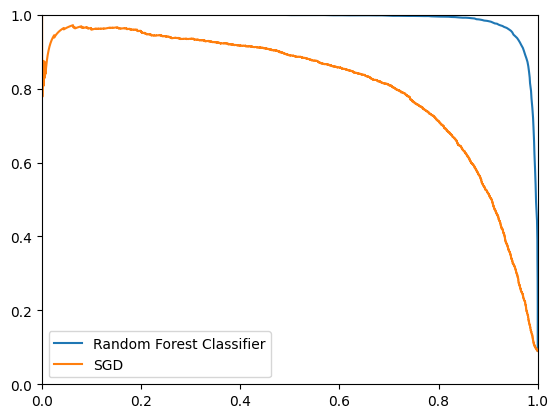

In [ ]:
plt.plot(rf_recall,rf_precision,label="Random Forest Classifier")
plt.plot(recalls,precisions,label="SGD")
plt.legend(loc='lower left')
plt.axis([0,1,0,1])

In [ ]:
rf_auc_score = roc_auc_score(y_train_5,y_RF_scores)
print(rf_auc_score)

0.9983436731328145


If each pixel value represents the intensity (i.e., grayscale brightness), wouldn’t changing that value distort the image? And if so, why is it still helpful or even necessary?”              


The image structure is preserved
Even though individual pixel values are changed, **the relative differences between pixel values are preserved — that’s what matters most**.

Example: an edge between a dark and a light region is still an edge after standardization.

The contrast, which defines shapes and features, is retained.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

cv_RF = cross_val_score(RfClassifier,X_train_scaled,y_train,cv=3,scoring="accuracy")
print(cv_RF)

[0.96445 0.96255 0.96645]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
KNN_clf = KNeighborsClassifier()
X_train_scaled = scaler.fit_transform(X_train)
cv_KNN = cross_val_score(KNN_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")
print(cv_KNN)

[0.9376 0.9411 0.9424]


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()
param_grid = {
    'weights' :['uniform', 'distance'],
    'n_neighbors':[3,5,7,9],

}

grid_serach = GridSearchCV(KNN_clf,cv=3,param_grid=param_grid,scoring='accuracy')

gv = grid_serach.fit(X_train,y_train)

print("Best parameters:", gv.best_params_)
print("Best cross-validation score:", gv.best_score_)


Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9693333333333333


In [ ]:
import joblib

# Save the entire grid search object after fitting
joblib.dump(gv, "knn_gridsearchcv_model.pkl")


['knn_gridsearchcv_model.pkl']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf2 = KNeighborsClassifier(n_neighbors=3,weights='distance')

KNN_clf2.fit(X_train,y_train)

predd = KNN_clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(predd,y_test)
print(acc)

0.9717


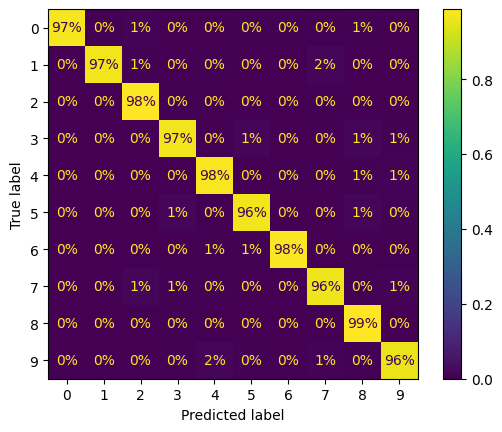

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(predd,y_test,values_format='.0%',normalize='true')

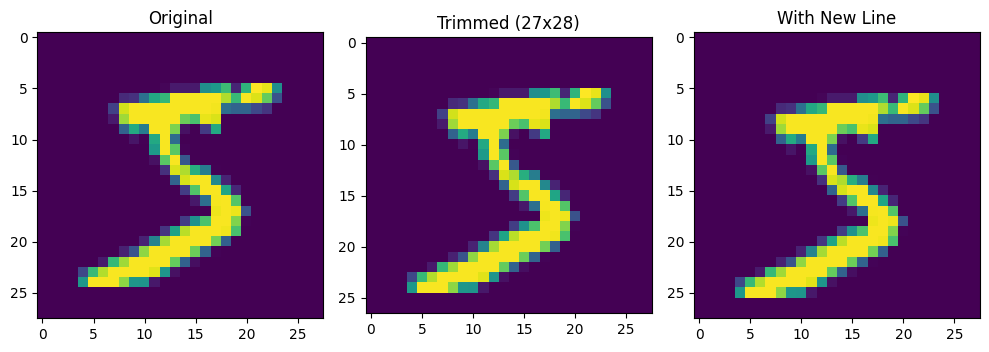

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x_lab5 = X[0]
dum = x_lab5.reshape(28, 28)
a = np.zeros(28)
dum_trimmed = dum[:27]                     # This is a 27x28 image
newline = np.vstack([a,dum_trimmed])       # Make it back to 28x28
newline = newline.reshape(28, 28)


fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(dum)
axs[0].set_title('Original')


axs[1].imshow(dum[:27])  # Will be 27x28
axs[1].set_title('Trimmed (27x28)')


axs[2].imshow(newline)   # Back to 28x28
axs[2].set_title('With New Line')


plt.tight_layout()
plt.show()


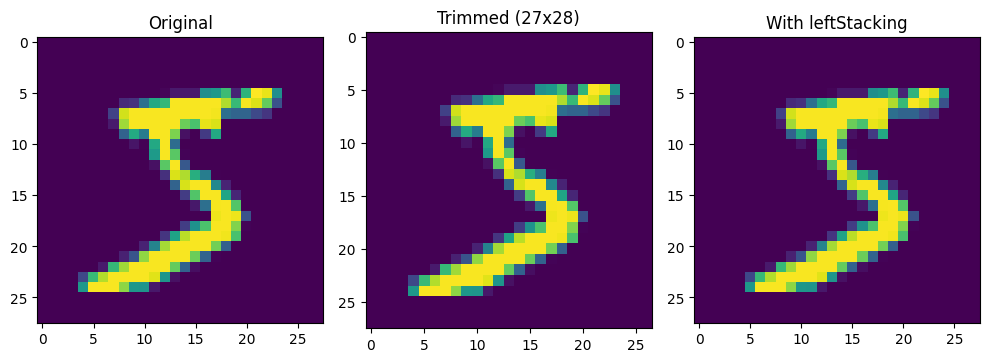

In [ ]:
leftTrimmed = dum[:,:-1]
b = np.zeros((28,1))
leftStacking = np.hstack([b,leftTrimmed])
leftStacking = leftStacking.reshape(28,28)
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(dum)
axs[0].set_title('Original')


axs[1].imshow(leftTrimmed)  # Will be 27x28
axs[1].set_title('Trimmed (27x28)')


axs[2].imshow(leftStacking)   # Back to 28x28
axs[2].set_title('With leftStacking')


plt.tight_layout()
plt.show()


In [ ]:
def DataAugmentation(data):

  data = data.reshape(28,28)

  #columns or rows of zeros
  row_zeros = np.zeros(28)
  column_zeros = np.zeros((28,1))

  # timming the data on foursides
  leftTrimSub = data[:,1:] #all rows except the first column
  rightTrimSub = data[:,:-1] #all rows except the last column
  topTrimSub = data[1:,:] #all columns except the first row
  bottomTrimSub = data[:-1,:] #all columns except the last row

  top_stack = np.vstack([row_zeros,bottomTrimSub])
  bottom_stack = np.vstack([topTrimSub,row_zeros])
  left_stack = np.hstack([column_zeros,rightTrimSub])
  right_stack = np.hstack([leftTrimSub,column_zeros])

  top = top_stack.reshape(28,28)
  bottom = bottom_stack.reshape(28,28)
  left = left_stack.reshape(28,28)
  right = right_stack.reshape(28,28)

  fig, axs = plt.subplots(1, 5, figsize=(10, 4))

  axs[0].imshow(top)
  axs[0].set_title('top')


  axs[1].imshow(bottom)  # Will be 27x28
  axs[1].set_title('bottom')


  axs[2].imshow(left)   # Back to 28x28
  axs[2].set_title('left')

  axs[3].imshow(right)   # Back to 28x28
  axs[3].set_title('right')

  axs[4].imshow(data)
  axs[4].set_title('Original')



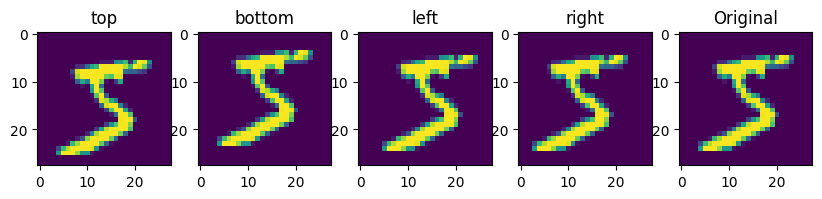

In [ ]:
DataAugmentation(X_train[0])

In [ ]:
def DataAugmentor(data):

  data = data.reshape(28,28)

  #columns or rows of zeros
  row_zeros = np.zeros(28)
  column_zeros = np.zeros((28,1))

  # timming the data on foursides
  leftTrimSub = data[:,1:] #all rows except the first column
  rightTrimSub = data[:,:-1] #all rows except the last column
  topTrimSub = data[1:,:] #all columns except the first row
  bottomTrimSub = data[:-1,:] #all columns except the last row

  top_stack = np.vstack([row_zeros,bottomTrimSub])
  bottom_stack = np.vstack([topTrimSub,row_zeros])
  left_stack = np.hstack([column_zeros,rightTrimSub])
  right_stack = np.hstack([leftTrimSub,column_zeros])

  top = top_stack.reshape(28,28)
  bottom = bottom_stack.reshape(28,28)
  left = left_stack.reshape(28,28)
  right = right_stack.reshape(28,28)

  return top.flatten(),bottom.flatten(),left.flatten(),right.flatten()



In [ ]:
augmentedData = []

for i in range(len(X)):
  original = X[i]
  top,bottom,left,right = DataAugmentor(original)

  augmentedData.extend([original,top,bottom,left,right])

print(augmentedData)

In [ ]:
X_augmented = np.array(augmentedData)

In [ ]:
np.save('/content/drive/MyDrive/X_augmented.npy', X_augmented)


In [6]:
import numpy as np

X_augmented = np.load('/content/drive/MyDrive/X_augmented.npy',allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/X_test.npy',allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/y_train.npy',allow_pickle=True)

y_test = np.load('/content/drive/MyDrive/y_test.npy',allow_pickle=True)

In [7]:
y_augmented = np.repeat(y, 5)


In [8]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = train_test_split(
    X_augmented, y_augmented, test_size=0.2, random_state=42, stratify=y_augmented
)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf2 = KNeighborsClassifier(n_neighbors=3,weights='distance')

KNN_clf2.fit(X_train_augmented,y_train_augmented)

predd = KNN_clf2.predict(X_test_augmented)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(predd,y_test_augmented)

print(round(accuracy_score, 2))

0.98


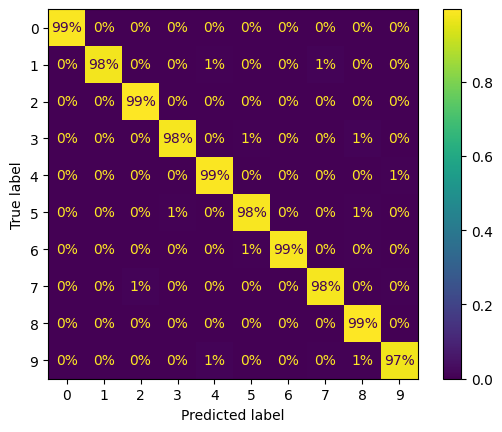

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(predd,y_test_augmented,normalize='true',values_format='.0%')